# Scraping DawgNation Articles
I am attempting to scrape text from articles on the DawgNation website.

In [27]:
import scrapy
from scrapy.crawler import CrawlerProcess
from selenium import webdriver
import time
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
browser = webdriver.Firefox()
browser.get('https://www.dawgnation.com/football/team-news')
for i in range(1, 20):
    elem = browser.find_element_by_id('load-more-category')
    elem.click()
    time.sleep(10)

I scraped this data from DawgNation, which is a fan site for University of Georgia athletics, with a major focus on football.  I encountered some difficulty with scraping this page due to the "Load More" button, which operates through JavaScript.  The package Selenium was able to help automate the loading process since links for subsequent pages were unavailable.

In [3]:
class DNSpider(scrapy.Spider):
    name = "SNS"
    
    # Here is where we insert our API call.
    start_urls = [
        'file:///C:/Users/Stacy%20Steed/Downloads/FootballTeam%20News%20-%20DawgNation.html'
        ]
       
    def parse(self, response):
        for x in response.css("li.cm-stream__item"):
            yield {
                'text': x.css("p.cm-stream__intro::text").extract_first(),
                'author': x.css("a.cm-stream__byline::text").extract_first(),
                'time': x.css("time.cm-meta-block__time::text").extract()
            }

            
process = CrawlerProcess({
    'FEED_FORMAT': 'json',
    'FEED_URI': 'dnheads.json',
    'ROBOTSTXT_OBEY': False,
    'AUTOTHROTTLE_ENABLED': False,
    'HTTPCACHE_ENABLED': True,
    'LOG_ENABLED': False,
})
                                         

# Starting the crawler with our spider.
process.crawl(DNSpider)
process.start()

In [42]:
headlines=pd.read_json('dnheads.json', orient='records')
print(headlines.shape)
display(headlines)

(240, 3)


,author,text,time
0,None,ATHENS — A request for \r\nquestions for the “...,[8 hours ago]
1,\r\n Mike Griffith ...,ATHENS — Georgia football \r\nfans have an exc...,[9 hours ago]
2,\r\n Mike Griffith ...,ATHENS — The \r\nGeorgia-Tennessee football ga...,[12 hours ago]
3,\r\n Mike Griffith ...,ATHENS — Kirby Smart is all \r\nabout developi...,[23 hours ago]
4,\r\n Brandon Adams ...,One of the most popular \r\ntopics around Dawg...,[1 day ago]
5,\r\n Chip Towers ...,ATHENS — Maybe Jeremy Pruitt\r\n has it under ...,[1 day ago]
6,\r\n Mike Griffith ...,ATHENS — Cue announcer \r\nvoice: “Throw the r...,[1 day ago]
7,\r\n Mike Griffith ...,ATHENS — Georgia tailback \r\nD’Andre Swift ac...,[2 days ago]
8,\r\n Mike Griffith ...,The Tennessee-Georgia game \r\ndoesn’t kick of...,[2 days ago]
9,\r\n Chip Towers ...,AN OPPOSING VIEW ATHENS — It\r\n seems like I’...,[2 days ago]


Data had to be cleaned to remove extraneous characters and extra spaces.

In [43]:
headlines.author = headlines.author.str.replace('\r\n', '')
headlines.author = headlines.author.str.replace('  ', '')
headlines.text = headlines.text.str.replace('\r\n', '')
headlines.text = headlines.text.str.replace('—', '')

In [44]:
display(headlines)

,author,text,time
0,None,ATHENS A request for questions for the “Ask G...,[8 hours ago]
1,Mike Griffith,ATHENS Georgia football fans have an exciting...,[9 hours ago]
2,Mike Griffith,ATHENS The Georgia-Tennessee football game wo...,[12 hours ago]
3,Mike Griffith,ATHENS Kirby Smart is all about developing de...,[23 hours ago]
4,Brandon Adams,One of the most popular topics around DawgNati...,[1 day ago]
5,Chip Towers,ATHENS Maybe Jeremy Pruitt has it under contr...,[1 day ago]
6,Mike Griffith,ATHENS Cue announcer voice: “Throw the record...,[1 day ago]
7,Mike Griffith,ATHENS Georgia tailback D’Andre Swift acknowl...,[2 days ago]
8,Mike Griffith,The Tennessee-Georgia game doesn’t kick off un...,[2 days ago]
9,Chip Towers,AN OPPOSING VIEW ATHENS It seems like I’ve be...,[2 days ago]


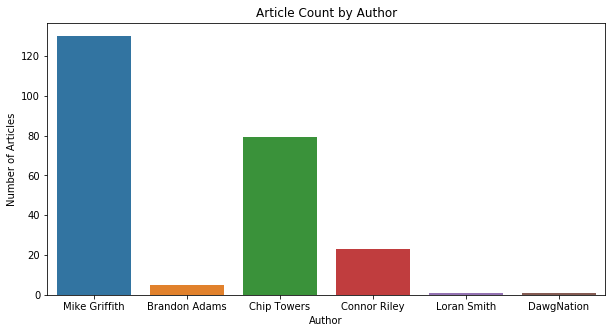

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x='author', data=headlines)
plt.title('Article Count by Author')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.show()

## Authorship
We see that by far Mike Griffith has writen the most articles at DawgNation over the last few weeks.  Chip Towers comes in second, with other authors writing significantly fewer articles.

In [52]:
headlines.text = headlines.text.str.replace('.', '')
headlines.text = headlines.text.str.replace(',', '')
words = headlines.text.str.cat(sep=' ').split()
pd.Series(words).value_counts()

the             293
Georgia         214
ATHENS          173
to              170
and             147
a               130
football        114
in              106
for              94
of               93
on               73
The              66
was              65
Bulldogs         63
is               58
at               52
Smart            52
Kirby            50
game             49
it               44
coach            42
his              40
that             39
about            39
No               37
has              36
out              35
with             35
COLUMBIA         33
from             33
               ... 
won               1
exception         1
RB                1
smile             1
Academy           1
aiming            1
100-yard          1
“JJ”              1
Saban             1
fan               1
check             1
month             1
connected         1
used              1
string            1
talks             1
weakness          1
Missouri’s        1
blocker           1


## Commonly Used Words
Many of the words used are what would be expected, including articles.  Other commonly used words were Georgia, Athens, football, Bulldogs, Smart, Kirby, and game.  These are all related to the game of football or Georgia Football program.